# Proyecto 3
### Integrantes
- Nicolle Gordillo
- Fabiola Contreras
- Sofía Velasquez
- María José Villafuerte

## Analisis Exploratorio

### Descripción del conjunto de datos

In [1]:
# IMPORTACIONES
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CARGA DE DATASETS
divorcios_df = pd.read_csv("divorcios_limpio.csv")
matrimonios_df = pd.read_csv("matrimonios_limpio.csv")

C:\Users\wolfu\AppData\Local\Temp\ipykernel_14748\3213548938.py:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  divorcios_df = pd.read_csv("divorcios_limpio.csv")
C:\Users\wolfu\AppData\Local\Temp\ipykernel_14748\3213548938.py:3: DtypeWarning: Columns (16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  matrimonios_df = pd.read_csv("matrimonios_limpio.csv")


In [3]:
# Resumen general: número de variables y observaciones por dataset
divorcios_shape = divorcios_df.shape
matrimonios_shape = matrimonios_df.shape

# Tipos de variables
divorcios_types = divorcios_df.dtypes
matrimonios_types = matrimonios_df.dtypes

(divorcios_shape, divorcios_types, matrimonios_shape, matrimonios_types)

((76669, 19),
 Departamento de Registro             float64
 Municipio de Registro                  int64
 Mes de Registro                      float64
 Ano de Registro                      float64
 Dia de la Ocurrencia                 float64
 Mes de la Ocurrencia                 float64
 Ano Ocurrencia                       float64
 Departamento de Ocurrencia           float64
 Municipio de Ocurrencia                int64
 Edad del Hombre                      float64
 Edad de la Mujer                     float64
 Nacionalidad del Hombre              float64
 Nacionalidad de la Mujer             float64
 Escolaridad del Hombre               float64
 Escolaridad de la Mujer              float64
 Ocupacion del Hombre                  object
 Ocupacion de la Mujer                 object
 Pueblo de Pertenencia del Hombre     float64
 Pueblo de Pertenencia de la Mujer    float64
 dtype: object,
 (832242, 23),
 Departamento de Registro             float64
 Municipio de Registro             

Estadísticas básicas de las variables numéricas

In [4]:
# Dataset divorcios
matrimonios_df.describe() 
divorcios_df.describe() 

,Departamento de Registro,Municipio de Registro,Mes de Registro,Ano de Registro,Dia de la Ocurrencia,Mes de la Ocurrencia,Ano Ocurrencia,Departamento de Ocurrencia,Municipio de Ocurrencia,Edad del Hombre,Edad de la Mujer,Nacionalidad del Hombre,Nacionalidad de la Mujer,Escolaridad del Hombre,Escolaridad de la Mujer,Pueblo de Pertenencia del Hombre,Pueblo de Pertenencia de la Mujer
count,76669.000000,76669.000000,76669.000000,76669.000000,76669.000000,76669.000000,65552.000000,76669.000000,76669.000000,76669.000000,76669.000000,76669.000000,76669.000000,76669.000000,76669.000000,76669.000000,76669.000000
mean,7.790137,783.952380,6.553874,2018.880251,15.750603,6.305560,2019.555223,8.025330,808.115627,470.445356,468.057181,360.465703,361.807262,5.570935,5.533853,6.222985,6.249527
std,6.978000,698.461718,3.404897,3.224580,8.678669,3.305056,2.614229,7.016503,702.143049,479.062676,480.558945,603.601280,611.713141,3.173225,3.177932,2.835524,2.812197
min,1.000000,101.000000,1.000000,2013.000000,1.000000,1.000000,2015.000000,1.000000,101.000000,17.000000,15.000000,10.000000,32.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,101.000000,4.000000,2016.000000,8.000000,3.000000,2017.000000,1.000000,103.000000,33.000000,30.000000,320.000000,320.000000,3.000000,3.000000,4.000000,4.000000
50%,6.000000,601.000000,7.000000,2019.000000,16.000000,6.000000,2020.000000,6.000000,614.000000,51.000000,46.000000,320.000000,320.000000,4.000000,4.000000,4.000000,5.000000
75%,13.000000,1301.000000,10.000000,2022.000000,23.000000,9.000000,2022.000000,13.000000,1314.000000,999.000000,999.000000,320.000000,320.000000,9.000000,9.000000,9.000000,9.000000
max,22.000000,2217.000000,12.000000,2024.000000,31.000000,12.000000,2023.000000,22.000000,2217.000000,999.000000,999.000000,9999.000000,9999.000000,9.000000,9.000000,9.000000,9.000000


In [5]:
# Matrimonios
matrimonios_df.describe() 

,Departamento de Registro,Municipio de Registro,Mes de Registro,Ano de Registro,Ano Ocurrencia,Clase de Union,Numero de Nupcias del Hombre,Numero de Nupcias de la Mujer,Edad del Hombre,Edad de la Mujer,Pueblo de Pertenencia del Hombre,Pueblo de Pertenencia de la Mujer,Nacionalidad del Hombre,Nacionalidad de la Mujer,Escolaridad del Hombre,Escolaridad de la Mujer,Departamento de Ocurrencia,Dia de la Ocurrencia,Mes de la Ocurrencia,Area Geografica de la Ocurrencia
count,832242.000000,832242.000000,832242.000000,832242.000000,671996.000000,832242.000000,671996.000000,671996.000000,832242.000000,832242.000000,832242.000000,832242.000000,832242.000000,832242.000000,832242.00000,832242.000000,832242.000000,832242.000000,832242.000000,380630.000000
mean,9.579895,965.483121,6.470238,2018.069674,2019.041819,2.965339,6.457903,6.454924,30.129403,27.203175,3.266632,3.443963,322.271840,321.967771,3.05759,3.117449,9.589712,16.052043,6.697891,2.126033
std,6.396578,640.256366,3.593166,3.219232,2.609263,0.918205,3.720808,3.723653,16.521325,16.827932,2.106755,2.287599,46.021786,41.938488,1.62841,1.930229,6.382463,8.629011,3.599157,2.625505
min,1.000000,101.000000,1.000000,2013.000000,2015.000000,1.000000,1.000000,1.000000,14.000000,12.000000,1.000000,1.000000,8.000000,8.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,401.000000,3.000000,2015.000000,2017.000000,3.000000,1.000000,1.000000,23.000000,20.000000,1.000000,1.000000,320.000000,320.000000,2.00000,2.000000,4.000000,9.000000,3.000000,1.000000
50%,10.000000,1003.000000,6.000000,2018.000000,2019.000000,3.000000,9.000000,9.000000,27.000000,24.000000,4.000000,4.000000,320.000000,320.000000,3.00000,3.000000,10.000000,16.000000,7.000000,1.000000
75%,14.000000,1418.000000,10.000000,2021.000000,2021.000000,3.000000,9.000000,9.000000,33.000000,30.000000,4.000000,4.000000,320.000000,320.000000,4.00000,4.000000,14.000000,23.000000,10.000000,1.000000
max,22.000000,2217.000000,12.000000,2024.000000,2023.000000,9.000000,9.000000,9.000000,999.000000,999.000000,9.000000,9.000000,9999.000000,9999.000000,9.00000,9.000000,22.000000,31.000000,12.000000,11.000000


Estadísticas de las variables categóricas

In [6]:
# Divorcios
divorcios_df.describe(include="O")

,Ocupacion del Hombre,Ocupacion de la Mujer
count,76669.0,76669.0
unique,87.0,85.0
top,97.0,97.0
freq,14887.0,28758.0


In [7]:
# Matrimonios
matrimonios_df.describe(include="O") 

,Ocupacion del Hombre,Ocupacion de la Mujer,Municipio de Ocurrencia
count,832242.0,832242.0,832242
unique,87.0,119.0,691
top,92.0,97.0,101
freq,212724.0,511407.0,54088


Valores nulos

Ano Ocurrencia    11117
dtype: int64


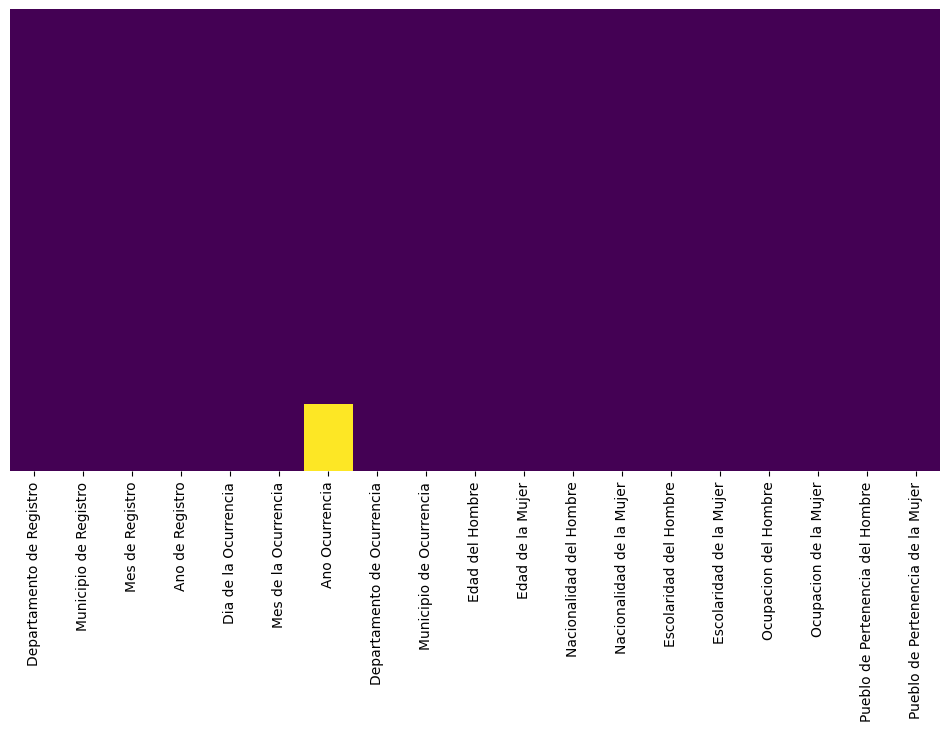

In [8]:
# Divorcios
missing_values = divorcios_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)
plt.figure(figsize=(12,6))
sns.heatmap(divorcios_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

Area Geografica de la Ocurrencia    451612
Ano Ocurrencia                      160246
Numero de Nupcias del Hombre        160246
Numero de Nupcias de la Mujer       160246
dtype: int64


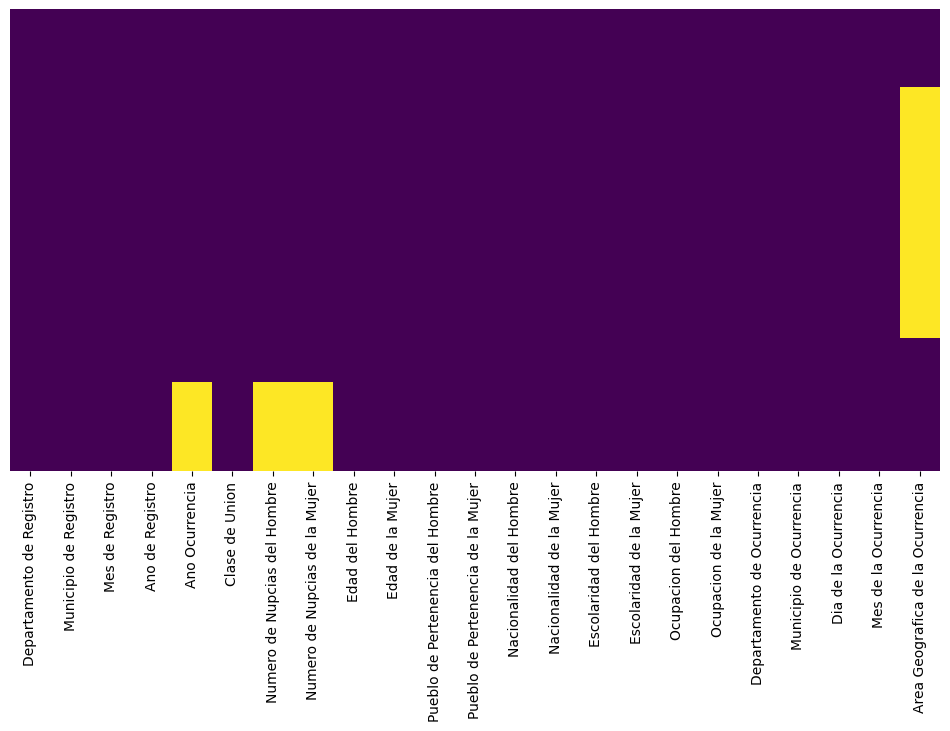

In [9]:
# Matrimonios
missing_values = matrimonios_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)
plt.figure(figsize=(12,6))
sns.heatmap(matrimonios_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

### Resumen de las variables 

Resumenes númericos

In [10]:
# Variables numéricas y categóricas
div_numeric = divorcios_df.select_dtypes(include=np.number)
div_cat = divorcios_df.select_dtypes(exclude=np.number)

mat_numeric = matrimonios_df.select_dtypes(include=np.number)
mat_cat = matrimonios_df.select_dtypes(exclude=np.number)
# Descripción numérica
print("\n### Estadísticas descriptivas - divorcios_df")
print(div_numeric.describe())

print("\n### Estadísticas descriptivas - matrimonios_df")
print(mat_numeric.describe())


### Estadísticas descriptivas - divorcios_df
       Departamento de Registro  Municipio de Registro  Mes de Registro  \
count              76669.000000           76669.000000     76669.000000   
mean                   7.790137             783.952380         6.553874   
std                    6.978000             698.461718         3.404897   
min                    1.000000             101.000000         1.000000   
25%                    1.000000             101.000000         4.000000   
50%                    6.000000             601.000000         7.000000   
75%                   13.000000            1301.000000        10.000000   
max                   22.000000            2217.000000        12.000000   

       Ano de Registro  Dia de la Ocurrencia  Mes de la Ocurrencia  \
count     76669.000000          76669.000000          76669.000000   
mean       2018.880251             15.750603              6.305560   
std           3.224580              8.678669              3.305056  

Distribución de Variables Numéricas

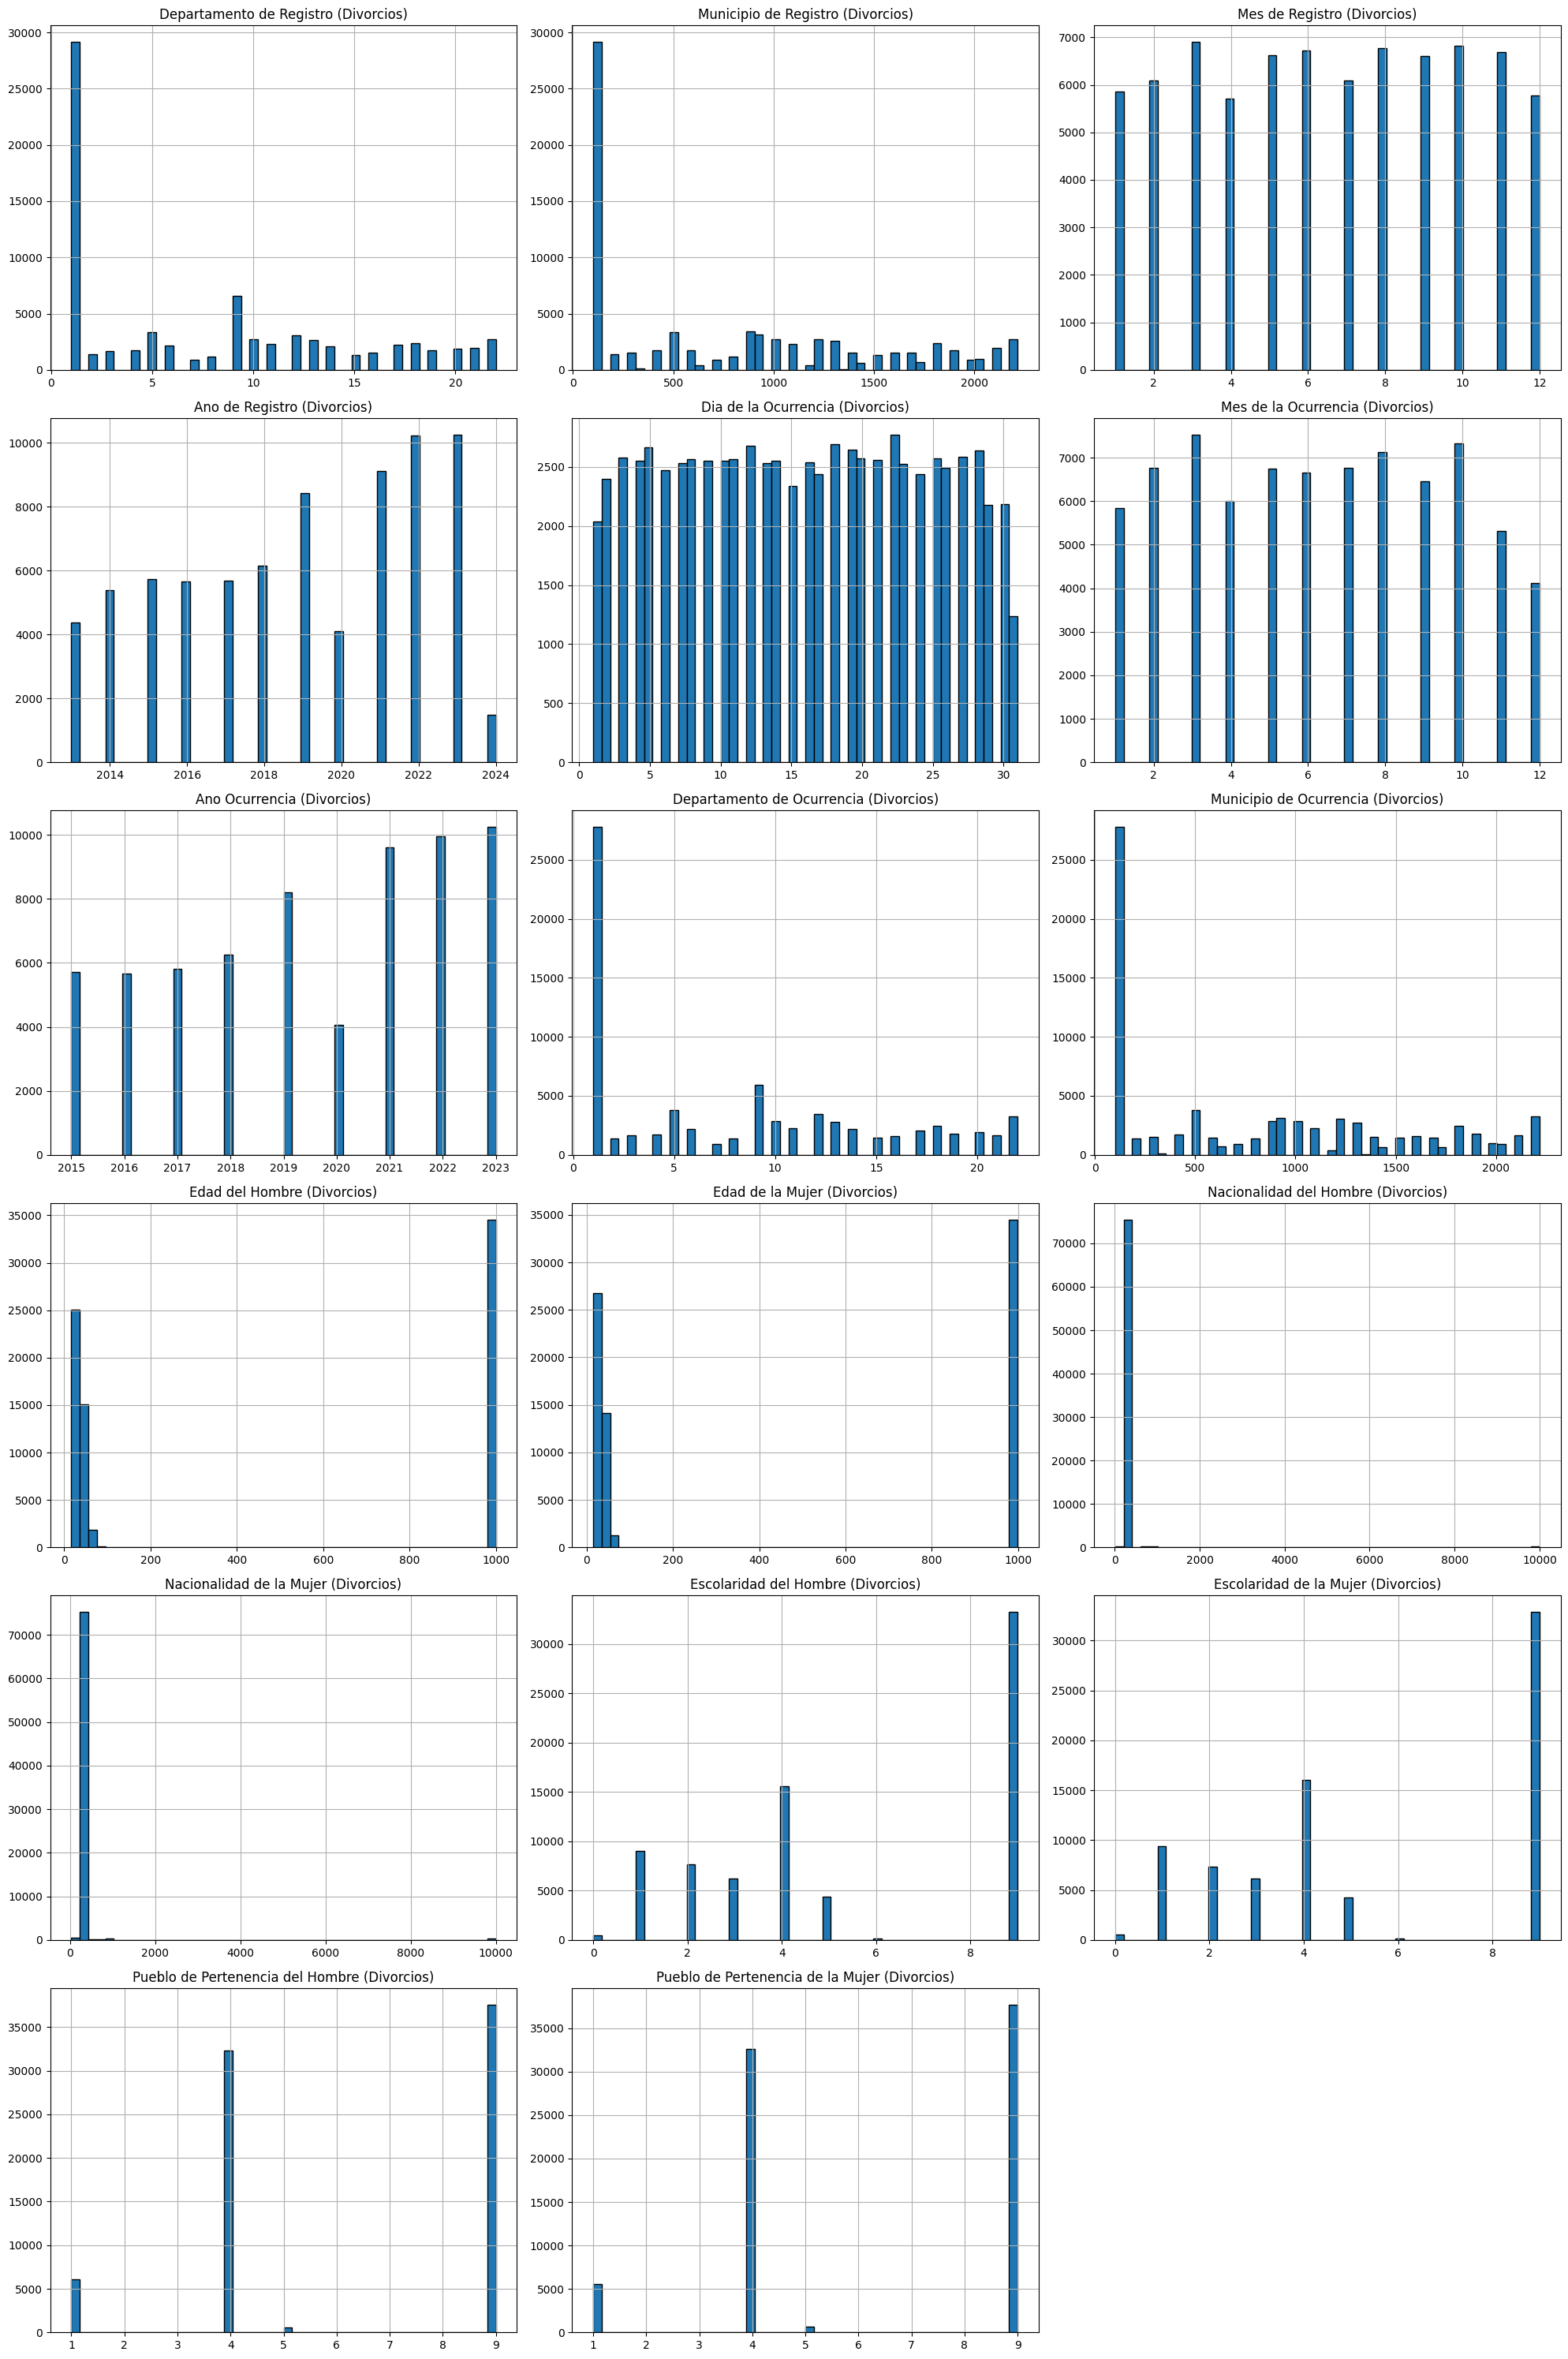

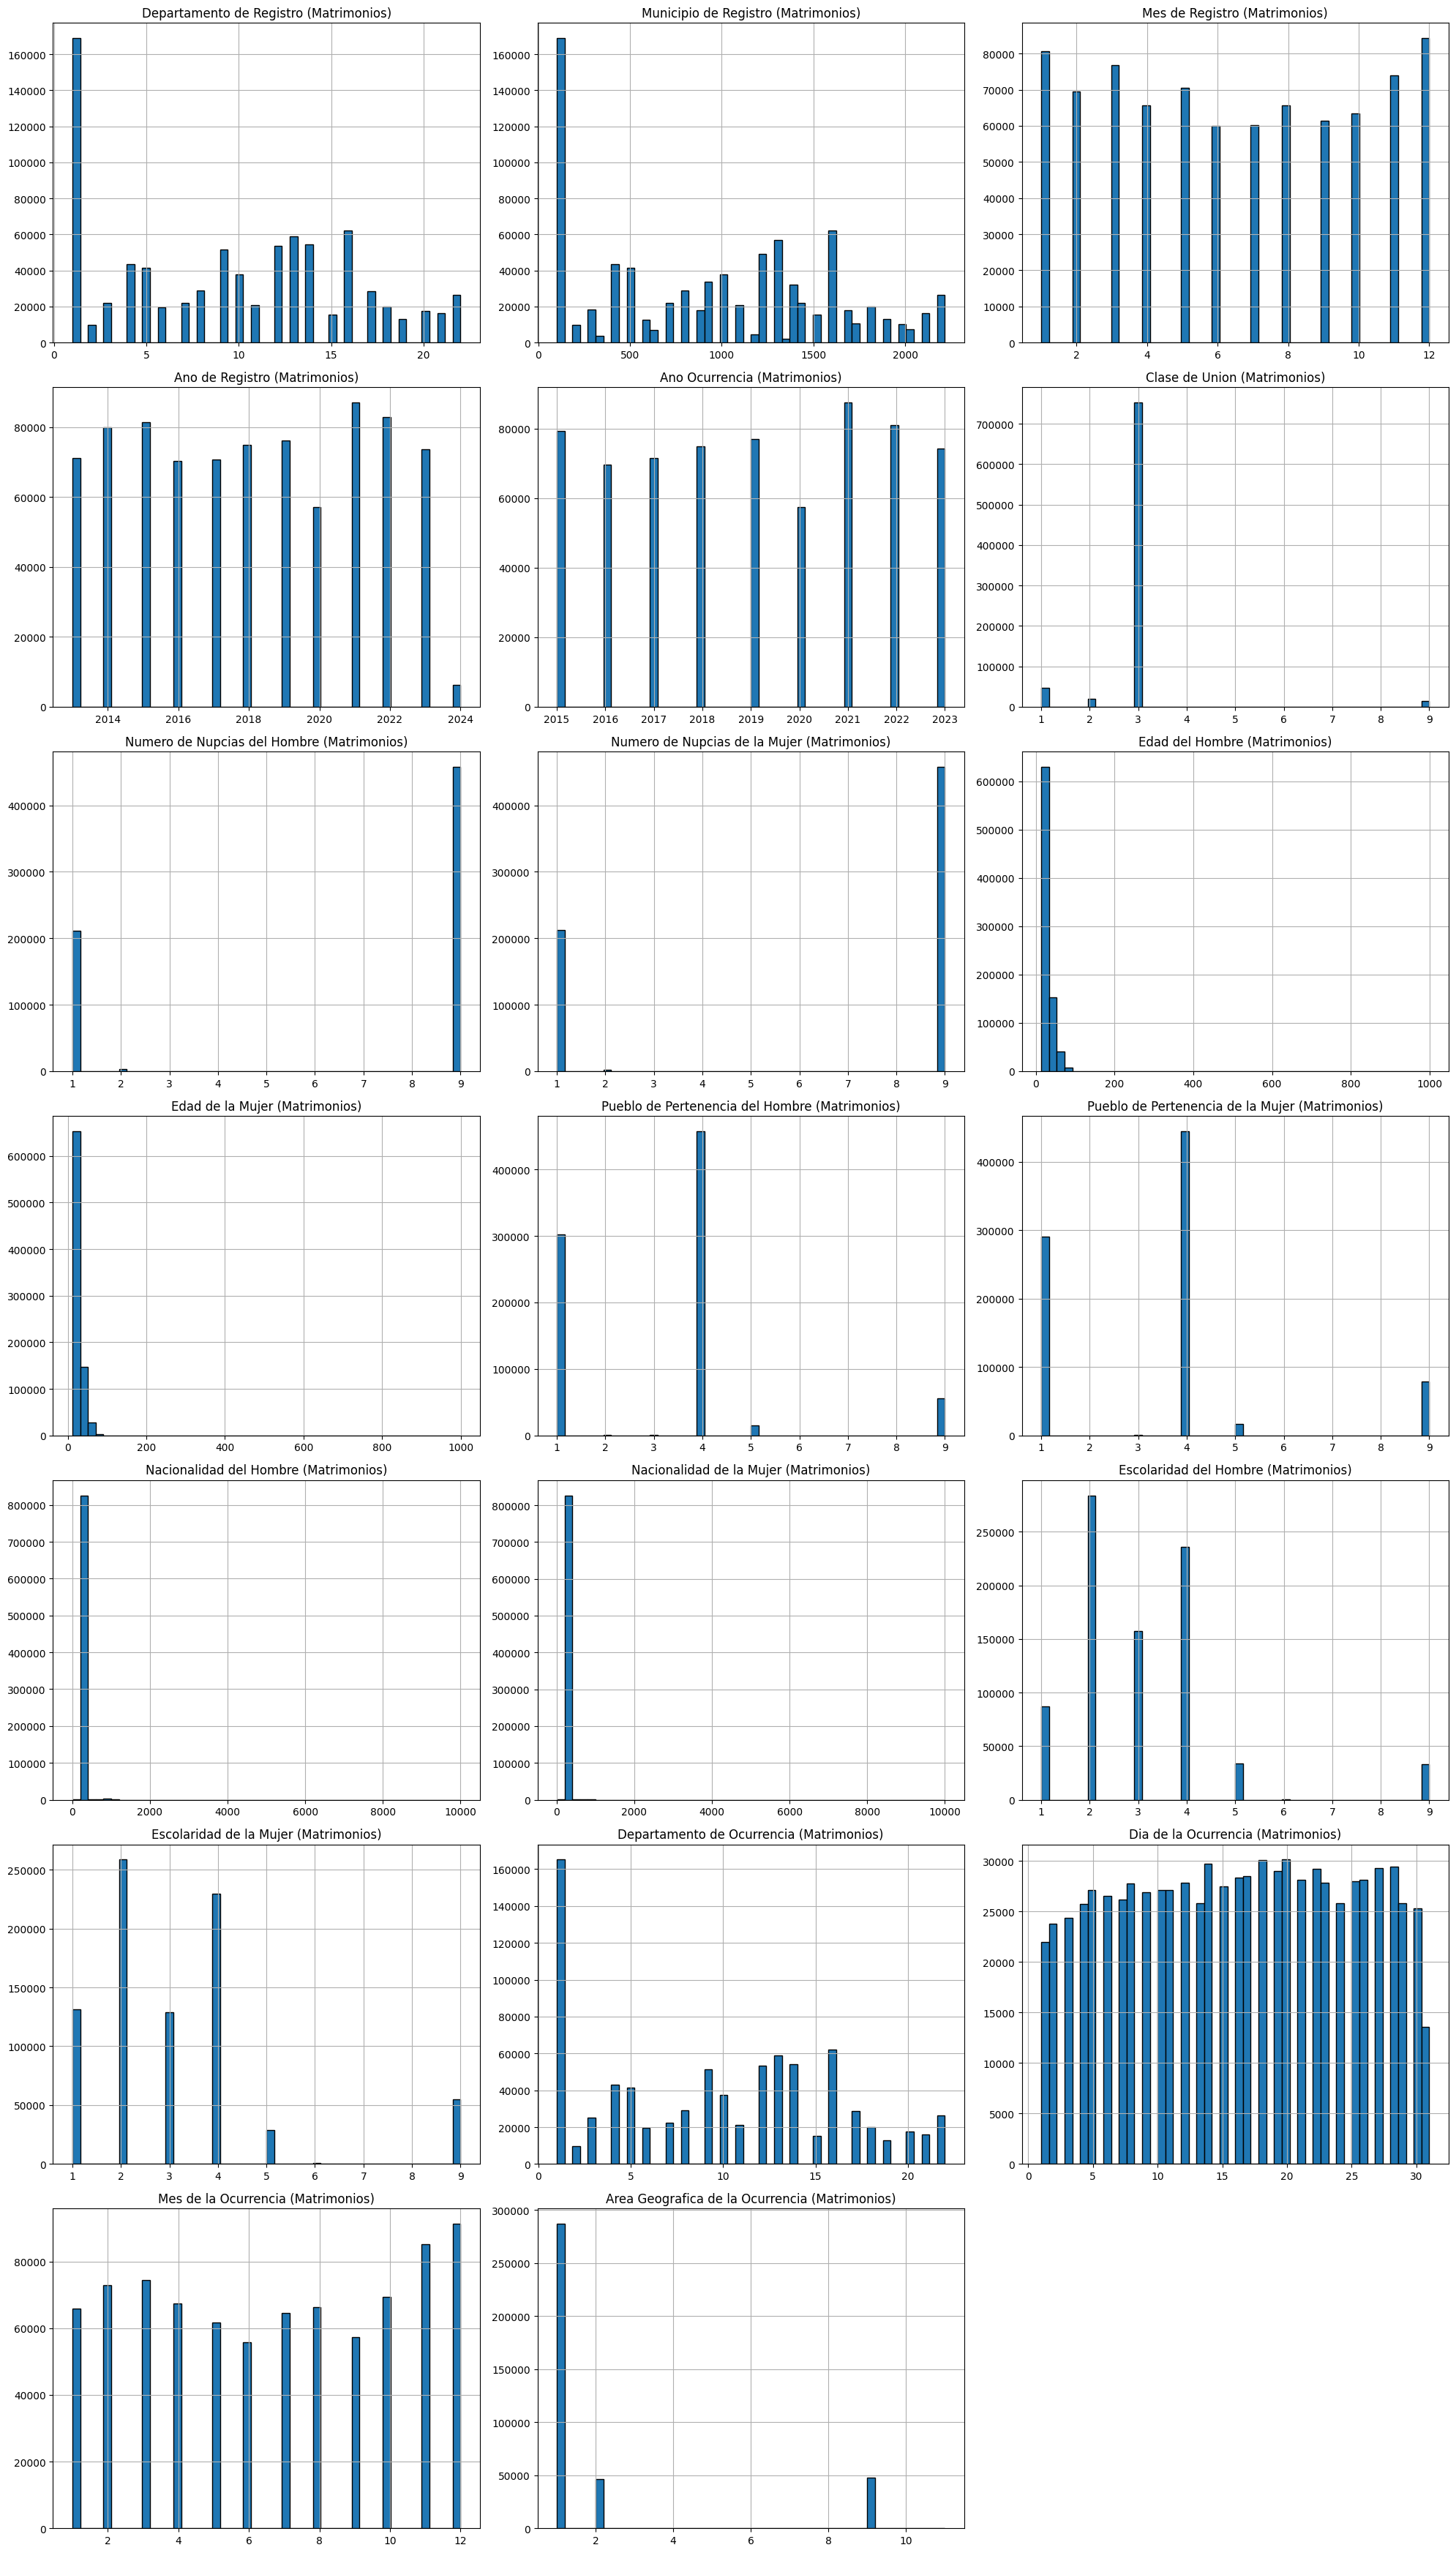

In [11]:
def graficar_histogramas(df_numeric, titulo_dataset):
    cols = 3
    rows = (len(df_numeric.columns) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(df_numeric.columns):
        df_numeric[col].hist(ax=axes[i], bins=50, edgecolor="black")
        axes[i].set_title(f"{col} ({titulo_dataset})")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

graficar_histogramas(div_numeric, "Divorcios")
graficar_histogramas(mat_numeric, "Matrimonios")


Análisis de Variables Categóricas

In [12]:
# TABLAS DE FRECUENCIA (CATEGÓRICAS)
print("\n### Frecuencias - Variables Categóricas divorcios_df")
for col in div_cat.columns:
    print(f"\n{col}:\n{div_cat[col].value_counts().head()}")

print("\n### Frecuencias - Variables Categóricas matrimonios_df")
for col in mat_cat.columns:
    print(f"\n{col}:\n{mat_cat[col].value_counts().head()}")


### Frecuencias - Variables Categóricas divorcios_df

Ocupacion del Hombre:
Ocupacion del Hombre
97.0    14887
99.0    13550
92.0     8520
52.0     4291
98.0     3317
Name: count, dtype: int64

Ocupacion de la Mujer:
Ocupacion de la Mujer
97.0    28758
99.0    14799
98.0     5849
NEOG     5452
23.0     3794
Name: count, dtype: int64

### Frecuencias - Variables Categóricas matrimonios_df

Ocupacion del Hombre:
Ocupacion del Hombre
92.0    212724
97.0    166129
52.0     59399
61.0     53488
NEOG     35607
Name: count, dtype: int64

Ocupacion de la Mujer:
Ocupacion de la Mujer
97.0    511407
NEOG    125502
23.0     29848
52.0     17058
41.0     14343
Name: count, dtype: int64

Municipio de Ocurrencia:
Municipio de Ocurrencia
101     54088
108     15734
115     14560
110     11848
0101    11320
Name: count, dtype: int64


### Correlación entre variables

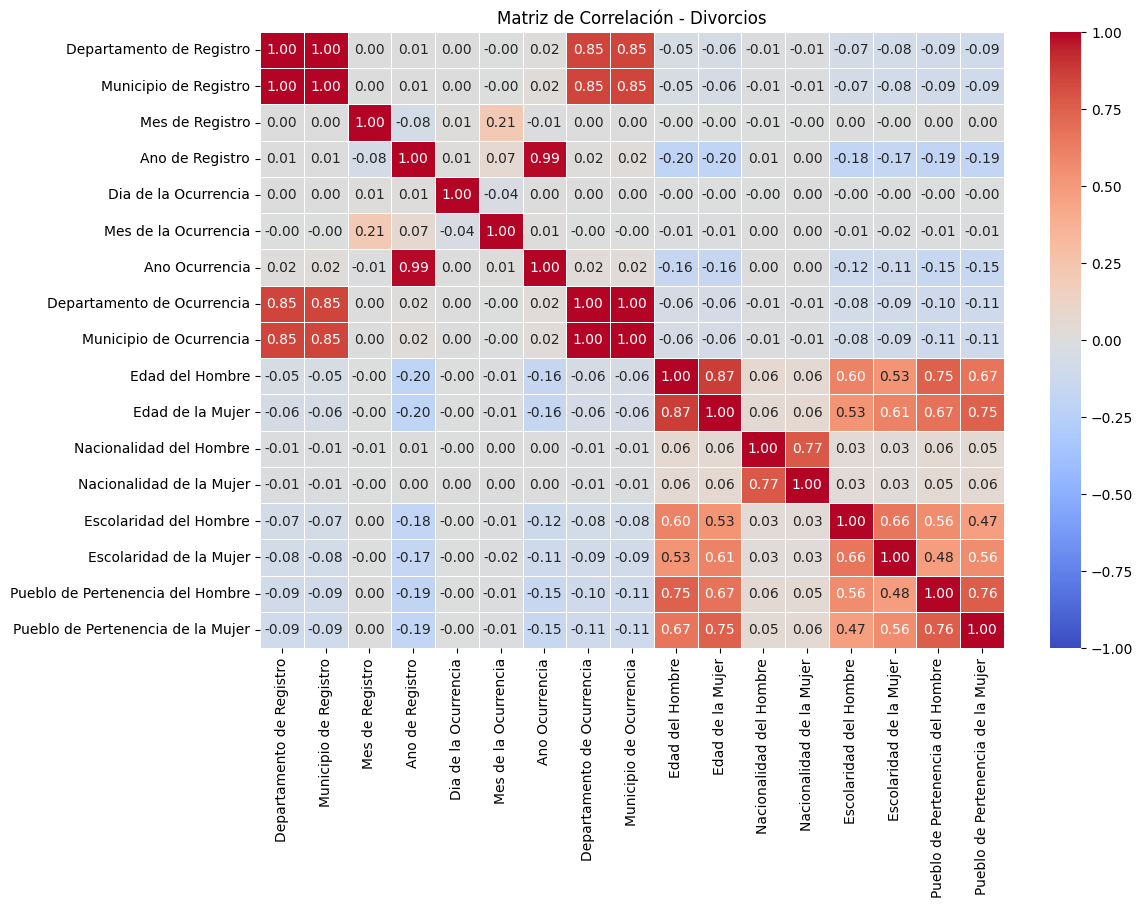

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(div_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title("Matriz de Correlación - Divorcios")
plt.show()

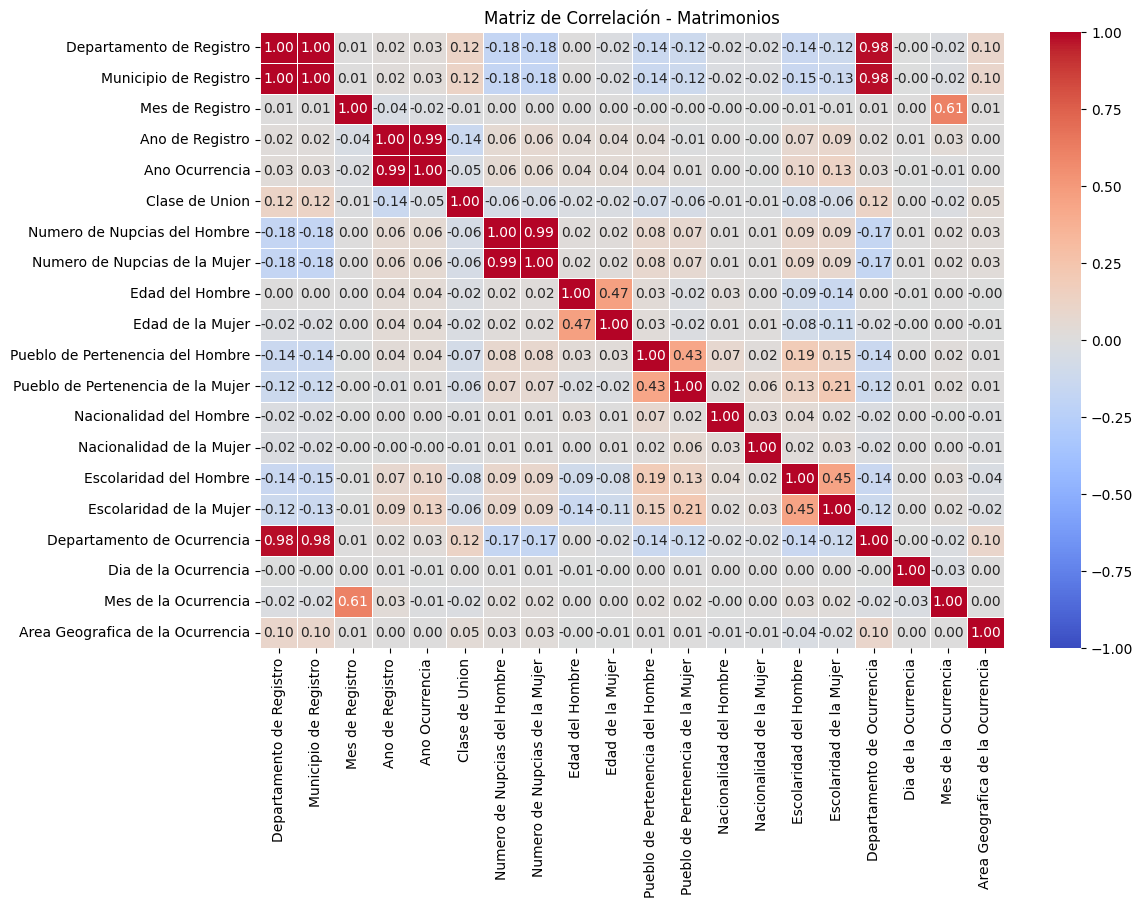

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(mat_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title("Matriz de Correlación - Matrimonios")
plt.show()

# Clusters

In [34]:
divorcios_df = pd.read_csv("divorcios_limpio.csv")

# Reemplazar "IGNORADO" y "NEOG" por NaN en las columnas de ocupación
ocupacion_columns = ['Ocupacion del Hombre', 'Ocupacion de la Mujer']

# Reemplazar valores "IGNORADO" y "NEOG" por NaN
divorcios_df[ocupacion_columns] = divorcios_df[ocupacion_columns].replace(["IGNORADO", "NEOG"], np.nan)
divorcios_df[ocupacion_columns] = divorcios_df[ocupacion_columns].apply(pd.to_numeric, errors='coerce')

# Mostramos los tipos de datos y eliminamos columnas no numéricas
divorcios_num = divorcios_df.select_dtypes(include=[np.number])

# Visualizamos resumen
print(divorcios_num.shape)
divorcios_num.head()

(76669, 19)


C:\Users\wolfu\AppData\Local\Temp\ipykernel_14748\1696647347.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  divorcios_df = pd.read_csv("divorcios_limpio.csv")


,Departamento de Registro,Municipio de Registro,Mes de Registro,Ano de Registro,Dia de la Ocurrencia,Mes de la Ocurrencia,Ano Ocurrencia,Departamento de Ocurrencia,Municipio de Ocurrencia,Edad del Hombre,Edad de la Mujer,Nacionalidad del Hombre,Nacionalidad de la Mujer,Escolaridad del Hombre,Escolaridad de la Mujer,Ocupacion del Hombre,Ocupacion de la Mujer,Pueblo de Pertenencia del Hombre,Pueblo de Pertenencia de la Mujer
0,1.0,101,12.0,2016.0,3.0,11.0,2016.0,1.0,101,999.0,999.0,32.0,320.0,9.0,9.0,98.0,23.0,9.0,9.0
1,1.0,101,8.0,2016.0,17.0,5.0,2016.0,1.0,101,58.0,999.0,32.0,320.0,9.0,9.0,98.0,98.0,9.0,9.0
2,17.0,1701,8.0,2016.0,11.0,8.0,2016.0,1.0,101,61.0,53.0,32.0,320.0,0.0,0.0,99.0,99.0,9.0,9.0
3,1.0,101,3.0,2017.0,7.0,10.0,2016.0,1.0,101,39.0,38.0,40.0,320.0,9.0,4.0,52.0,26.0,9.0,4.0
4,19.0,1905,2.0,2017.0,23.0,11.0,2016.0,2.0,207,999.0,999.0,152.0,320.0,9.0,9.0,72.0,98.0,9.0,9.0


El clustering es sensible a la escala, así que normalizamos los datos:

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Reemplazo condicionado por columna
divorcios_num_clean = divorcios_num.copy()

# Columnas donde 9 es considerado como válido
valid_9_columns = ['Departamento de Registro', 'Mes de Registro', 'Dia de la Ocurrencia', 'Mes de la Ocurrencia', 'Departamento de Ocurrencia']
# Columnas donde 9 es considerado como ignorado
ignore_9_columns = ['Pueblo de Pertenencia del Hombre', 'Pueblo de Pertenencia de la Mujer', 'Escolaridad del Hombre', 'Escolaridad de la Mujer']

# Reemplazar 9 por NaN en las columnas donde 9 debe ser ignorado
divorcios_num_clean[ignore_9_columns] = divorcios_num_clean[ignore_9_columns].replace(9, np.nan)

# Reemplazar 9999 por NaN en las columnas donde 9999 debe ser ignorado
divorcios_num_clean['Nacionalidad del Hombre'] = divorcios_num_clean['Nacionalidad del Hombre'].replace(9999, np.nan)
divorcios_num_clean['Nacionalidad de la Mujer'] = divorcios_num_clean['Nacionalidad de la Mujer'].replace(9999, np.nan)

# Reemplazar 999 por NaN en las columnas donde 999 debe ser ignorado
divorcios_num_clean['Edad del Hombre'] = divorcios_num_clean['Edad del Hombre'].replace(999, np.nan)
divorcios_num_clean['Edad de la Mujer'] = divorcios_num_clean['Edad de la Mujer'].replace(999, np.nan)

# Reemplazar 99 por NaN en las columnas donde 99 debe ser ignorado
divorcios_num_clean['Ocupacion del Hombre'] = divorcios_num_clean['Ocupacion del Hombre'].replace(99, np.nan)
divorcios_num_clean['Ocupacion de la Mujer'] = divorcios_num_clean['Ocupacion de la Mujer'].replace(99, np.nan)

# Ahora se puede imputar y escalar
imputer = SimpleImputer(strategy="mean")  
divorcios_imputed = imputer.fit_transform(divorcios_num_clean)

scaler = StandardScaler()
divorcios_scaled = scaler.fit_transform(divorcios_imputed)

Usamos el método del codo y el coeficiente de silueta:

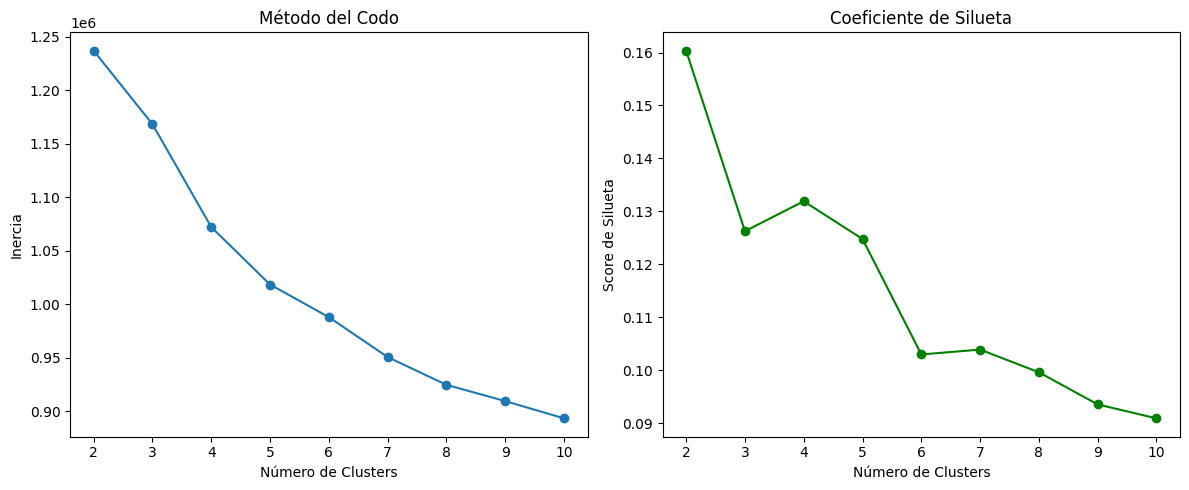

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(divorcios_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(divorcios_scaled, kmeans.labels_))

# Graficamos ambos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")

plt.subplot(1,2,2)
plt.plot(k_range, silhouette, marker='o', color='green')
plt.title("Coeficiente de Silueta")
plt.xlabel("Número de Clusters")
plt.ylabel("Score de Silueta")

plt.tight_layout()
plt.show()

Selecciona el número óptimo:

In [37]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(divorcios_scaled)

# Añadimos el resultado al DataFrame original
divorcios_df["Cluster"] = clusters

Agrupamos por cluster para observar tendencias:

In [38]:
cluster_summary = divorcios_df.groupby("Cluster").mean(numeric_only=True)
cluster_summary.T  # Transpuesta para mejor lectura

Cluster,0,1,2,3
Departamento de Registro,9.903008,15.426100,2.871108,3.577962
Municipio de Registro,996.726597,1548.301173,291.543504,361.947796
Mes de Registro,6.423454,6.576082,6.626091,6.464056
Ano de Registro,2019.486651,2018.904103,2017.147528,2021.069447
Dia de la Ocurrencia,15.814633,15.683007,15.710469,15.878402
Mes de la Ocurrencia,6.234032,6.307369,6.188193,6.488938
Ano Ocurrencia,2019.916839,2019.643667,2017.899479,2021.231692
Departamento de Ocurrencia,10.205475,15.678292,3.064408,3.827206
Municipio de Ocurrencia,1028.130281,1573.836652,311.607874,387.675367
Edad del Hombre,163.279824,496.723064,651.317733,279.322776


También contamos cuántos casos hay por grupo:

In [39]:
divorcios_df["Cluster"].value_counts()

Cluster
2    26239
1    25663
3    18849
0     5918
Name: count, dtype: int64